<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE256-AdvDataMining/blob/main/Johns_Hopkins_APL_Parker_Solar_Probe_Whistler_Mode_Waves_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Import the necessary libraries

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

### Step 2: Load the audio file

In [9]:
audio_path = '/content/drive/MyDrive/SJSU/Sem1/CMPE256 - Advanced Data Mining/Assign3/Johns Hopkins APL - Parker Solar Probe - Whistler Mode Waves 2.mp3'  # Replace with your audio file path
y, sr = librosa.load(audio_path)

### Step 3: Display a Spectrogram

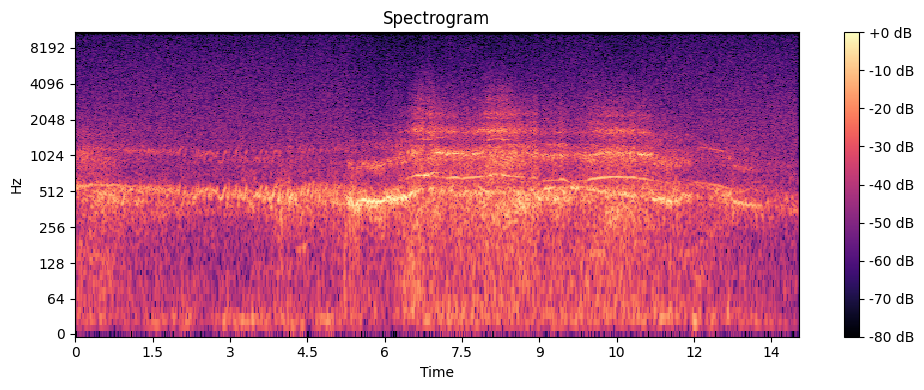

In [10]:
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()
plt.show()

### Step 4: Compute a Mel-scaled Spectrogram

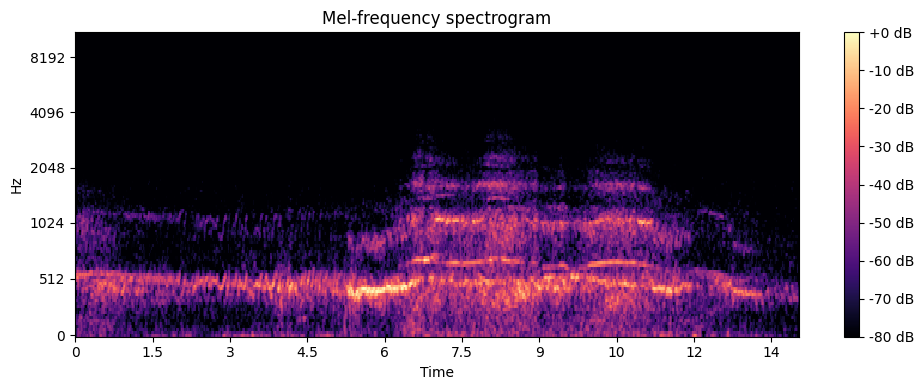

In [11]:
S = librosa.feature.melspectrogram(y=y, sr=sr)
plt.figure(figsize=(10, 4))
S_DB = librosa.amplitude_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

### Step 5: Short-time Fourier Transform (STFT)

<ipython-input-12-67de2354264e>:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')


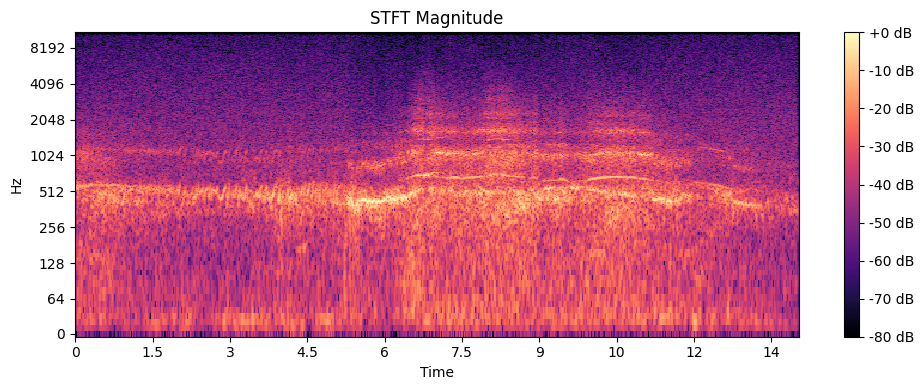

In [12]:
D = librosa.stft(y)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Magnitude')
plt.tight_layout()
plt.show()

### Step 6: Beat Tracker

Estimated tempo: 143.55 beats per minute


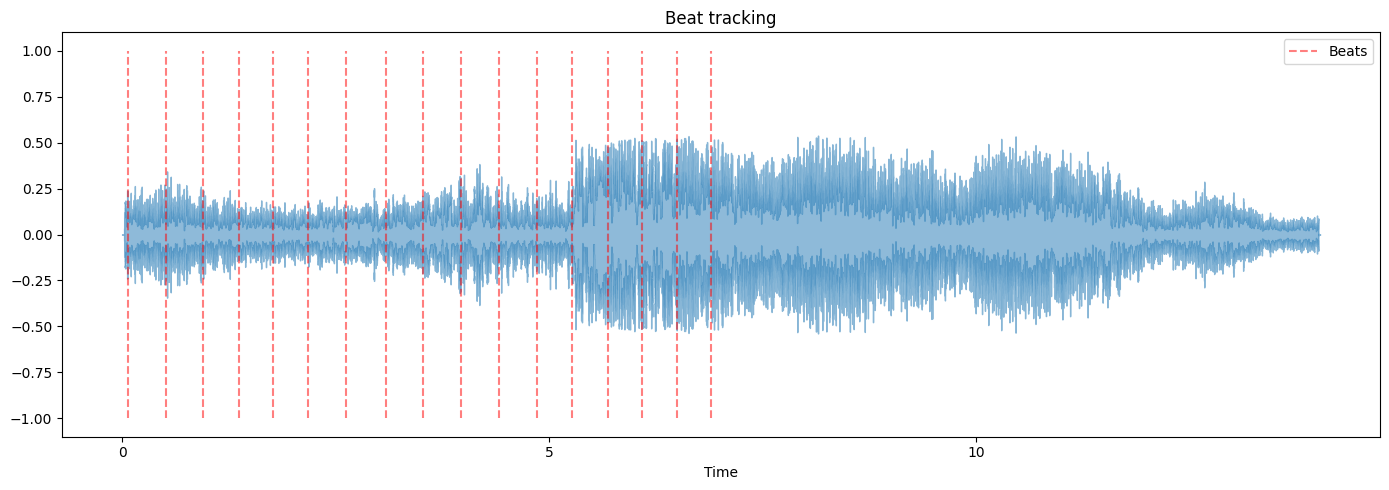

In [13]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))
# Plot the beat locations over the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.vlines(librosa.frames_to_time(beats, sr=sr), -1, 1, color='r', alpha=0.5, linestyle='--', label='Beats')
plt.legend()
plt.title('Beat tracking')
plt.tight_layout()
plt.show()

### Step 7: Compute the Constant-Q Transform

<ipython-input-14-93323fcc2868>:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note')


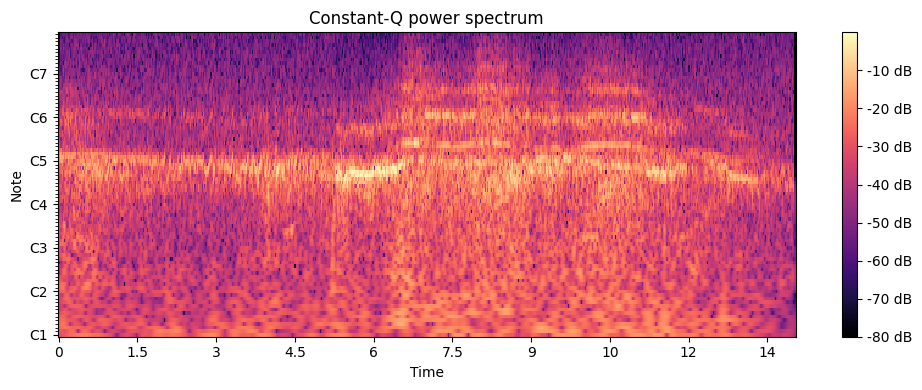

In [14]:
C = librosa.cqt(y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr, x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrum')
plt.tight_layout()
plt.show()